# Business Problem Understanding

* Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

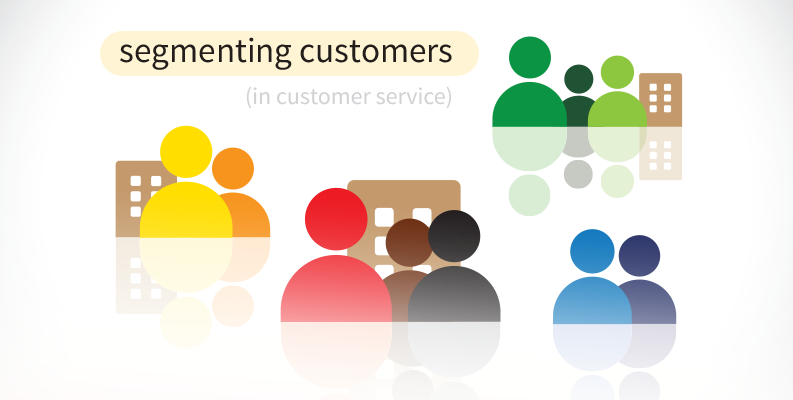

# Step 2 : Data Understanding

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Select relevant features (for example, 'Annual Income (k$)' and 'Spending Score (1-100)')
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
# Determine the optimal number of clusters using the Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

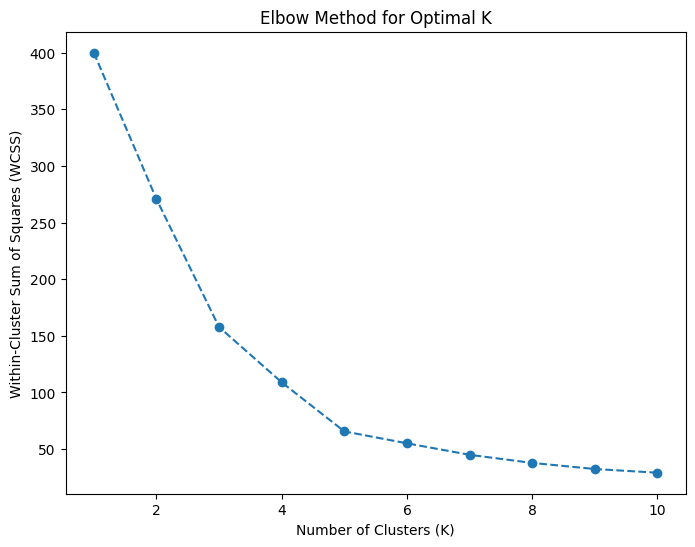

In [8]:
# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [9]:
# Based on the Elbow method, choose the optimal K (number of clusters)
optimal_k = 5  # Adjust this based on your analysis

In [10]:
# Apply K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

In [13]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

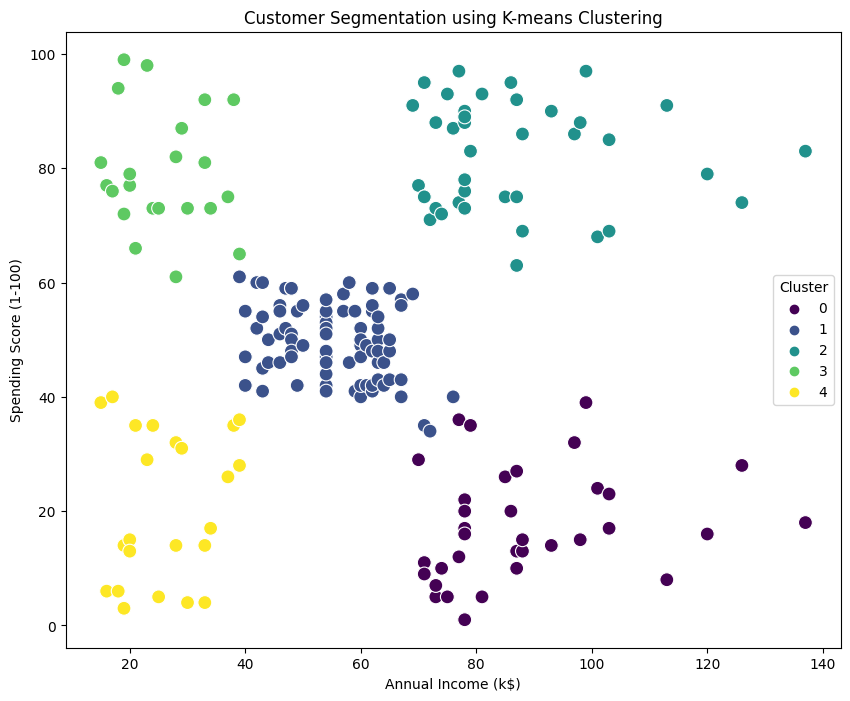

In [14]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()